In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

In [2]:
arr_1d = np.arange(12)
print(arr_1d)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [4]:
arr_2d = np.arange(12).reshape(3,4)
print(arr_2d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [5]:
print(arr_1d.flatten())
print(arr_2d.flatten())

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [6]:
print(arr_1d.shape)
print(arr_2d.shape)

(12,)
(3, 4)


In [7]:
x,y = 1,2
print(arr_2d[x,y])
print(arr_1d[x*4+y])

6
6


In [8]:
print(arr_1d.strides)
print(arr_2d.strides)

(8,)
(32, 8)


In [9]:
type(arr_1d[0])

numpy.int64

In [ ]:
arr_1d.itemsize

8

In [10]:
arr_1d_32 = arr_1d.astype(np.int32)
arr_2d_32 = arr_2d.astype(np.int32)
print(arr_1d_32.strides)
print(arr_2d_32.strides)

(4,)
(16, 4)


In [11]:
arr_1d_32.itemsize

4

In [12]:
from numpy.lib.stride_tricks import as_strided

In [13]:
shapeShifted = as_strided(arr_1d, strides=(4*8,1*8), shape=(3,4)) 
print(shapeShifted)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [14]:
duplicated = as_strided(arr_1d, strides=(0, 1*arr_1d.itemsize), shape = (2,arr_1d.shape[0]))
duplicated

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [27]:
as_strided(arr_1d, strides=(8, 7), shape = (4,4))

array([[        0,       256,    131072,  50331648],
       [        1,       512,    196608,  67108864],
       [        2,       768,    262144,  83886080],
       [        3,      1024,    327680, 100663296]])

In [28]:
as_strided(arr_1d, strides=(16, 16), shape = (5,5))  #possibility to reshape an array

array([[ 0,  2,  4,  6,  8],
       [ 2,  4,  6,  8, 10],
       [ 4,  6,  8, 10,  0],
       [ 6,  8, 10,  0,  0],
       [ 8, 10,  0,  0, 29]])

In [17]:
board = np.arange(16).reshape((4,4))
board

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [18]:
neighbors = as_strided(board, shape=(3,3), strides=board.strides)
neighbors

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [19]:
board.strides

(32, 8)

In [20]:
for x0 in range(2):
  print()
  for x1 in range(2):
    print()
    for x2 in range(3):
      for x3 in range(3):
        print(board[x0+x2,x1+x3])



0
1
2
4
5
6
8
9
10

1
2
3
5
6
7
9
10
11


4
5
6
8
9
10
12
13
14

5
6
7
9
10
11
13
14
15


In [21]:
board_flat = board.flatten()
board_flat

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [22]:
for x0 in range(2):
  print()
  for x1 in range(2):
    print()
    for x2 in range(3):
      for x3 in range(3):
        print(board_flat[x0*4+x2*4+x1+x3])



0
1
2
4
5
6
8
9
10

1
2
3
5
6
7
9
10
11


4
5
6
8
9
10
12
13
14

5
6
7
9
10
11
13
14
15


In [23]:
board.strides+board.strides

(32, 8, 32, 8)

In [24]:
neighbors = as_strided(board, shape=(2,2,3,3), strides=board.strides+board.strides)
neighbors

array([[[[ 0,  1,  2],
         [ 4,  5,  6],
         [ 8,  9, 10]],

        [[ 1,  2,  3],
         [ 5,  6,  7],
         [ 9, 10, 11]]],


       [[[ 4,  5,  6],
         [ 8,  9, 10],
         [12, 13, 14]],

        [[ 5,  6,  7],
         [ 9, 10, 11],
         [13, 14, 15]]]])

In [25]:
def grid_nD(arr):
    assert all(_len>2 for _len in arr.shape)
    
    nDims = len(arr.shape)
    newShape = [_len-2 for _len in arr.shape]
    newShape.extend([3] * nDims)
    
    newStrides = arr.strides + arr.strides
    return as_strided(arr, shape=newShape, strides=newStrides)

In [26]:
x = np.arange(25).reshape((5,5))
neighborhoods = grid_nD(x)
neighborhoods

array([[[[ 0,  1,  2],
         [ 5,  6,  7],
         [10, 11, 12]],

        [[ 1,  2,  3],
         [ 6,  7,  8],
         [11, 12, 13]],

        [[ 2,  3,  4],
         [ 7,  8,  9],
         [12, 13, 14]]],


       [[[ 5,  6,  7],
         [10, 11, 12],
         [15, 16, 17]],

        [[ 6,  7,  8],
         [11, 12, 13],
         [16, 17, 18]],

        [[ 7,  8,  9],
         [12, 13, 14],
         [17, 18, 19]]],


       [[[10, 11, 12],
         [15, 16, 17],
         [20, 21, 22]],

        [[11, 12, 13],
         [16, 17, 18],
         [21, 22, 23]],

        [[12, 13, 14],
         [17, 18, 19],
         [22, 23, 24]]]])

Rules of Conway's Game of Life:


1. Any live cell with fewer than two live neighbours dies, as if by underpopulation.
2. Any live cell with two or three live neighbours lives on to the next generation.
3. Any live cell with more than three live neighbours dies, as if by overpopulation.
4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
5. All other dead cells stay dead.



In [29]:
ruleOfLifeAlive = np.array([0, 0, 1, 1, 0, 0, 0, 0, 0])
ruleOfLifeDead  = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0])
print(ruleOfLifeAlive)
print(ruleOfLifeDead)

[0 0 1 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0]


In [30]:
def imshow_helper(board, sleepSeconds=0.5):
    ''' helper method to display a board for short time interval 
        being lazy and using the MATLAB style API '''
    plt.imshow(board, cmap="binary", interpolation="none")
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(sleepSeconds)
    
class GameOfLife(object):
    def __init__(self, board_size=(10,10)):
        full_size = tuple(i+2 for i in board_size)
        self.full = np.zeros(full_size, dtype=np.uint8)
        nd_slice = (slice(1, -1),) * len(board_size)
        self.board = self.full[nd_slice]
        self.ndims = len(self.board.shape)
        
    def run_board(self, N_ITERS = 10):
        imshow_helper(self.board)
        for i in range(N_ITERS):
            neighborhoods = grid_nD(self.full)
            sumOver = tuple(-(i+1) for i in range(self.ndims))
            neighborCt = np.sum(neighborhoods, sumOver) - self.board
            self.board[:] = np.where(self.board, 
                                     ruleOfLifeAlive[neighborCt], 
                                     ruleOfLifeDead[neighborCt])
            imshow_helper(self.board)

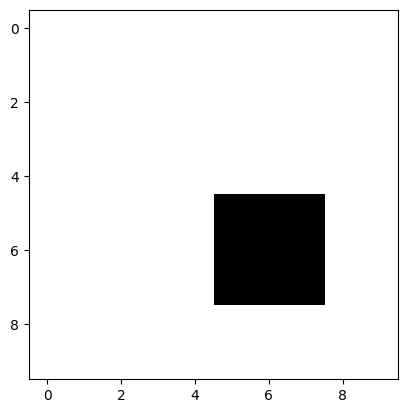

In [34]:
gol = GameOfLife()
gol.board[5:8,5:8] = 1

plt.imshow(gol.board, cmap="binary", interpolation="none")

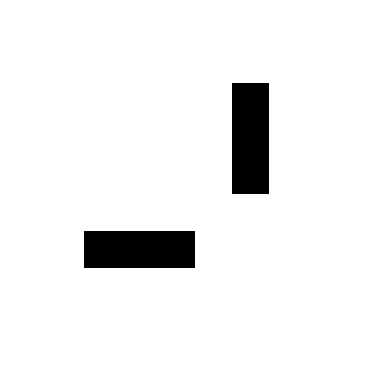

In [35]:
gol.run_board(10)

Source 

http://drsfenner.org/blog/2015/07/game-of-life-in-numpy-preliminaries-2/

http://drsfenner.org/blog/2015/08/game-of-life-in-numpy-2/